Name: Yesha Patel(000790164), Urvashiben Thakkar(000789927)

LTU Honor Code: "I pledge that on all academic work that I submit, I will neither give nor receive unauthorized aid, nor will I present another person's work as my own."


In [190]:
# Some memory clean-up
from keras import backend as BE
BE.clear_session()

In [191]:
from google.colab import drive
drive.mount('/content/drive') #google drive mounted

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
# Directories
b_dir = '/content/drive/My Drive/All-fingerprints-data/FPD_BC2_Y164'  #my directory path
train_dir = b_dir+'/train'
vali_dir = b_dir+'/validation'
test_dir = b_dir+'/test'
test_dir1 = b_dir+'/test1'   #Directory for Evalution 1 P0's 20 images

train_Y164_dir =b_dir+'/train/Y164'
train_U927_dir =b_dir+'/train/U927'
vali_Y164_dir = b_dir+'/validation/Y164'
vali_U927_dir = b_dir+'/validation/U927'
test_Y164_dir = b_dir+'/test/Y164'
test_U927_dir = b_dir+'/test/U927'
test_Y164_dir = b_dir+'/test1/Y164'

In [193]:
#printing total number of images in each folder
import os, shutil
print('total training Y164 images:', len(os.listdir(train_Y164_dir)))
print('total training U927 images:', len(os.listdir(train_U927_dir)))
print('total validation Y164 images:', len(os.listdir(vali_Y164_dir)))
print('total validation U927 images:', len(os.listdir(vali_U927_dir)))
print('total test Y164 images:', len(os.listdir(test_Y164_dir)))
print('total test U927 images:', len(os.listdir(test_U927_dir)))

total training Y164 images: 162
total training U927 images: 160
total validation Y164 images: 18
total validation U927 images: 20
total test Y164 images: 20
total test U927 images: 20


In [194]:
from keras.utils import image_dataset_from_directory
# shuffle is True by default
# class_mode='binary', better to specify?
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(300, 500),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    vali_dir,
    image_size=(300, 500),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(300, 500),
    batch_size=32,
    shuffle=False)
test_dataset1 = image_dataset_from_directory(
    test_dir1,
    image_size=(300, 500),
    batch_size=32,
    shuffle=False)

Found 322 files belonging to 2 classes.
Found 38 files belonging to 2 classes.
Found 40 files belonging to 2 classes.
Found 20 files belonging to 1 classes.


Model 1: CNN for Binary Classification 2

In [195]:
#importing libraries
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers

#data augmentation for model
data_augmentation = keras.Sequential(
    [
        #layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1)
    ]
)

In [196]:
#model building with data augmentation and dropout
def build_model():
  inputs = keras.Input(shape=(300, 500, 3))
  x = data_augmentation(inputs)
  x = layers.Rescaling(1./255)(x)
  x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding="same")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same")(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation="relu")(x)
  x = layers.Dense(128, activation="relu")(x)
  x = layers.Dropout(0.5)(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(loss="binary_crossentropy",
  # optimizer="rmsprop",
  optimizer=optimizers.RMSprop(learning_rate=1e-4), # learning rate
  metrics=["accuracy"])
  return model


In [197]:
m = build_model()
m.summary() #model summarise

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 500, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 300, 500, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 300, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 250, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 250, 32)      4640      
                                                             

In [198]:
#printing shape of data
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 300, 500, 3)
labels batch shape: (32,)


In [199]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        #filepath="CNN4CatsDogs.keras", # saved in VM. To be deleted within a day
        filepath="/drive/My Drive/h5/fingers_modelbc2a.h5",
        save_best_only=True,
        monitor="val_loss")
]

history = m.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/20
 9/11 [=======================>......] - ETA: 0s - loss: 0.8238 - accuracy: 0.4861

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 5s 145ms/step - loss: 0.8069 - accuracy: 0.4907 - val_loss: 0.7038 - val_accuracy: 0.4737
Epoch 2/20
11/11 [==============================] - 2s 72ms/step - loss: 0.7173 - accuracy: 0.4845 - val_loss: 0.7052 - val_accuracy: 0.5263
Epoch 3/20
11/11 [==============================] - 2s 126ms/step - loss: 0.6984 - accuracy: 0.5311 - val_loss: 0.6728 - val_accuracy: 0.5263
Epoch 4/20
11/11 [==============================] - 2s 70ms/step - loss: 0.6753 - accuracy: 0.5745 - val_loss: 0.6854 - val_accuracy: 0.5263
Epoch 5/20
11/11 [==============================] - 2s 87ms/step - loss: 0.6697 - accuracy: 0.6335 - val_loss: 0.6890 - val_accuracy: 0.4737
Epoch 5: early stopping


In [200]:
m.save('/drive/My Drive/h5/fingers_modelbc2a.h5') # best model save in folder

In [201]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [202]:
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_validation_loss)
print("Final Training Accuracy:", 100*final_training_accuracy)
print("Final Validation Accuracy:", 100*final_validation_accuracy)


Final Training Loss: 0.6696938276290894
Final Validation Loss: 0.6890349388122559
Final Training Accuracy: 63.35403919219971
Final Validation Accuracy: 47.36842215061188


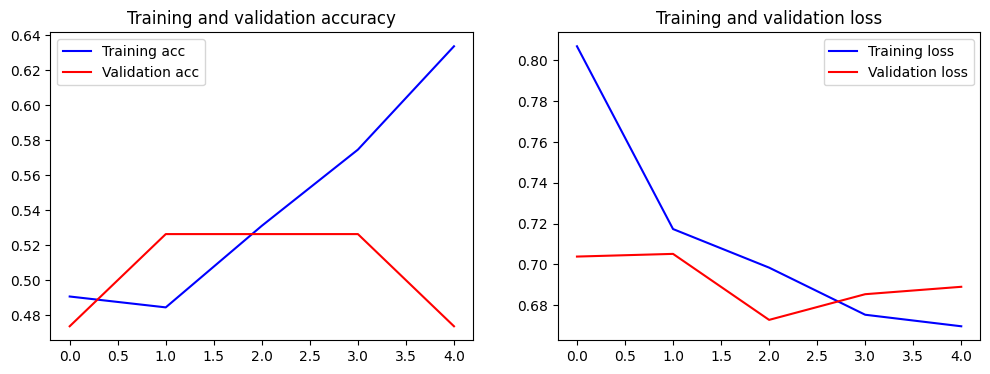

In [203]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'b', label='Training acc')
ax1.plot(epochs, val_acc, 'r', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [204]:
# To get the 1st batch from test dataset
for test_data_batch, test_labels_batch in test_dataset:
    print('test_data batch shape:', test_data_batch.shape)
    print('test_labels batch shape:', test_labels_batch.shape)
    break
#print(test_data_batch[0]) #float32

test_data batch shape: (32, 300, 500, 3)
test_labels batch shape: (32,)


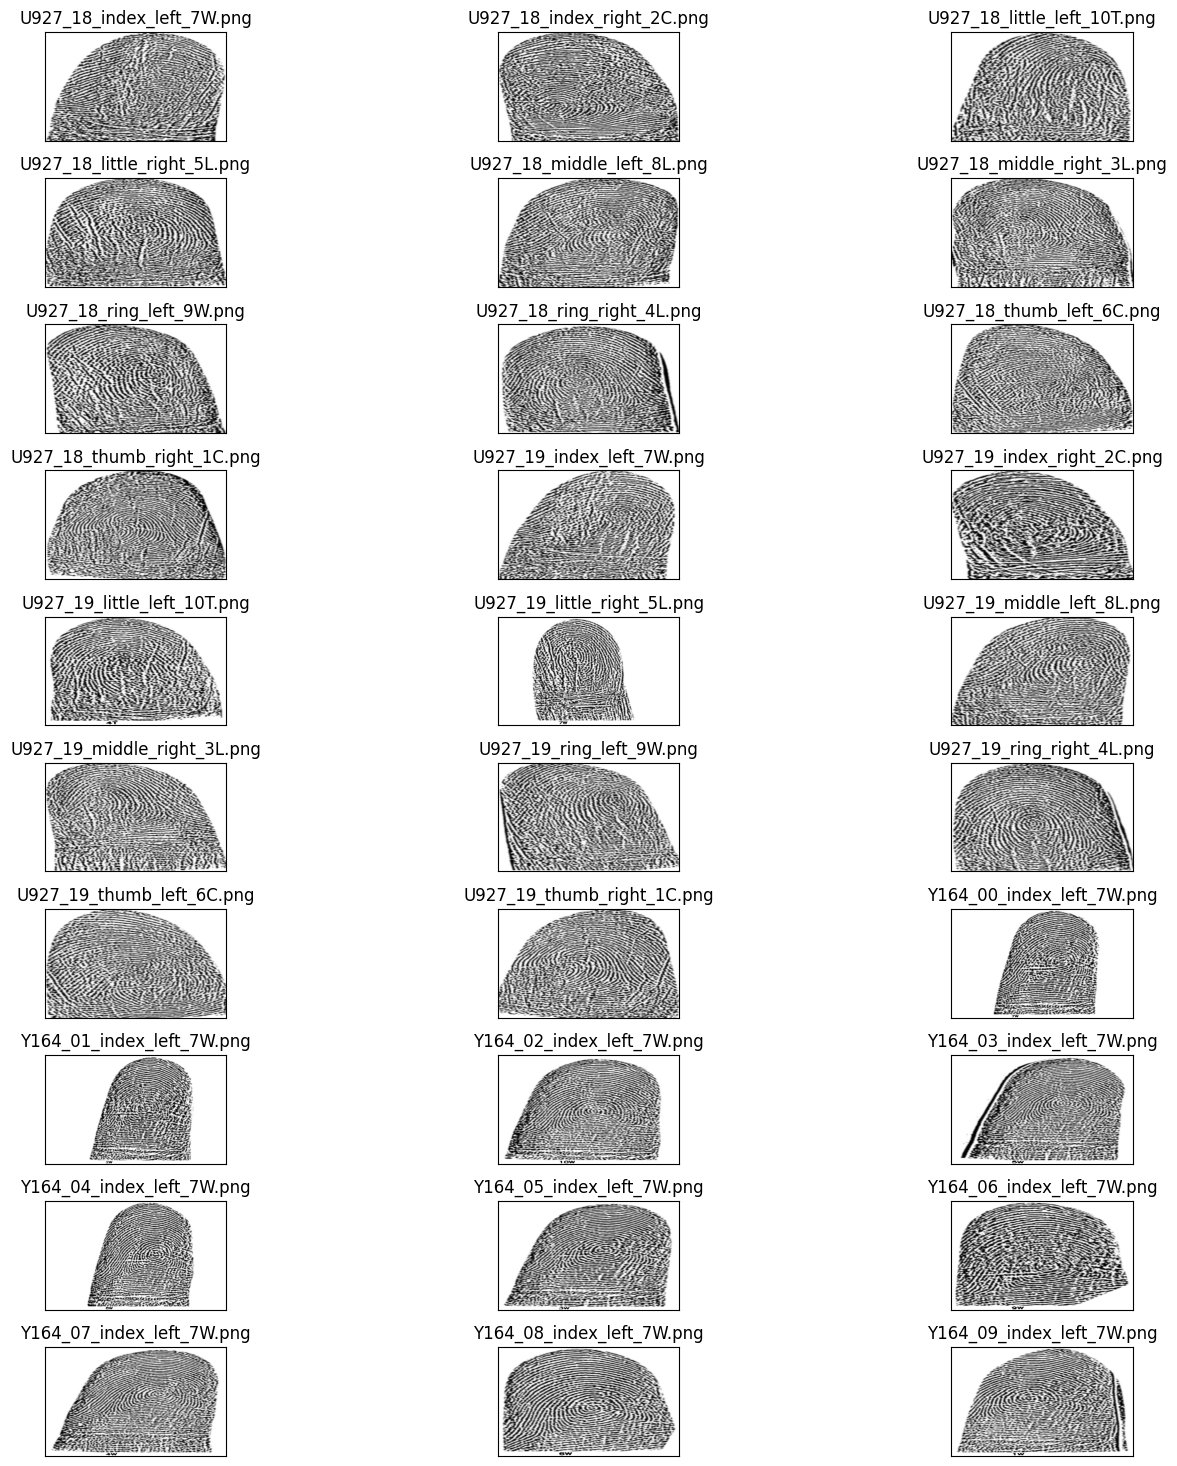

In [205]:
#displaying images from test dataset
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(10,3,i+1)
    plt.tight_layout()
    plt.imshow(test_data_batch[i].numpy().astype("uint8"))

    # Get the image filename
    image_name = test_dataset.file_paths[i].split('/')[-1]  # Assuming '/' as the path separator
    plt.title(image_name)  # Set the image name as the title

    plt.xticks([])
    plt.yticks([])

plt.show()


In [206]:
#model evaluation 1 using test dataset
test_loss1, test_acc1 = m.evaluate(test_dataset1)
print(f"Test accuracy for CNN: {100*test_acc1:.3f}")

1/1 [==============================] - 0s 224ms/step - loss: 0.6131 - accuracy: 1.0000
Test accuracy for CNN: 100.000


In [207]:
#model evaluation 2 using test dataset
test_model = keras.models.load_model("/drive/My Drive/h5/fingers_modelbc2a.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Restored model, Test accuracy for CNN: {100*test_acc:.3f}")

2/2 [==============================] - 0s 11ms/step - loss: 0.6840 - accuracy: 0.5000
Restored model, Test accuracy for CNN: 50.000


#**Model 2: Pre-Trained for Binary Classification 2 (VGG16(FE2, with DA))**

In [208]:
import numpy as np

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(300, 500, 3))

conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

#Adding a data augmentation stage and a classifier to the convolutional base
# data_augmentation = keras.Sequential(
#     [
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(0.1),
#         layers.RandomZoom(0.2),
#     ]
# )

inputs = keras.Input(shape=(300, 500, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model1 = keras.Model(inputs, outputs)
model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model1.summary()

This is the number of trainable weights after freezing the conv base: 0
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300, 500, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 300, 500, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 300, 500, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 300, 500, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 9, 15, 512)        14714688  
                                                     

In [209]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        #filepath="CNN4CatsDogs.keras", # saved in VM. To be deleted within a day
        filepath="/drive/My Drive/h5/fingers_model2bc2_FEa.h5",
        save_best_only=True,
        monitor="val_loss")
]

history = model1.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/20
11/11 [==============================] - 5s 241ms/step - loss: 65.5868 - accuracy: 0.7112 - val_loss: 0.4263 - val_accuracy: 0.9737
Epoch 2/20
11/11 [==============================] - 3s 156ms/step - loss: 4.5711 - accuracy: 0.9596 - val_loss: 3.5265 - val_accuracy: 0.9474
Epoch 3/20
11/11 [==============================] - 3s 164ms/step - loss: 0.4906 - accuracy: 0.9938 - val_loss: 2.2288 - val_accuracy: 0.9737
Epoch 3: early stopping


In [210]:
model1.save('/drive/My Drive/h5/fingers_model2bc2_FEa.h5') # best model save in folder

In [211]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [212]:
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_validation_loss)
print("Final Training Accuracy:", 100*final_training_accuracy)
print("Final Validation Accuracy:", 100*final_validation_accuracy)


Final Training Loss: 0.49062976241111755
Final Validation Loss: 2.228813886642456
Final Training Accuracy: 99.37888383865356
Final Validation Accuracy: 97.36841917037964


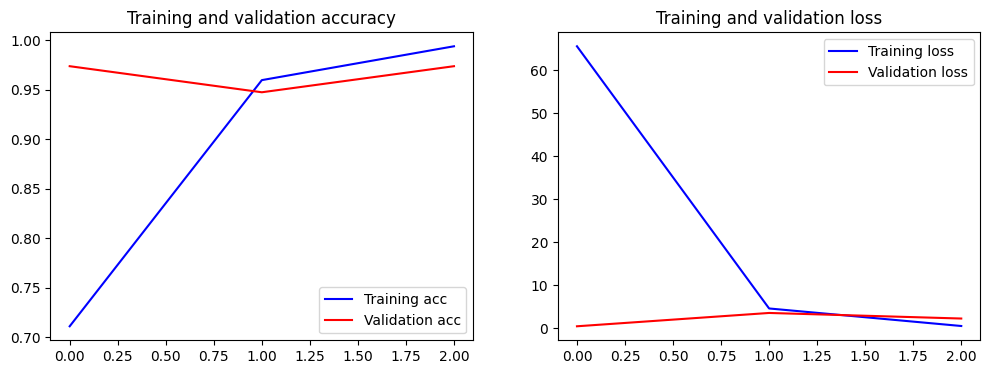

In [213]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'b', label='Training acc')
ax1.plot(epochs, val_acc, 'r', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

test_data batch shape: (32, 300, 500, 3)
test_labels batch shape: (32,)


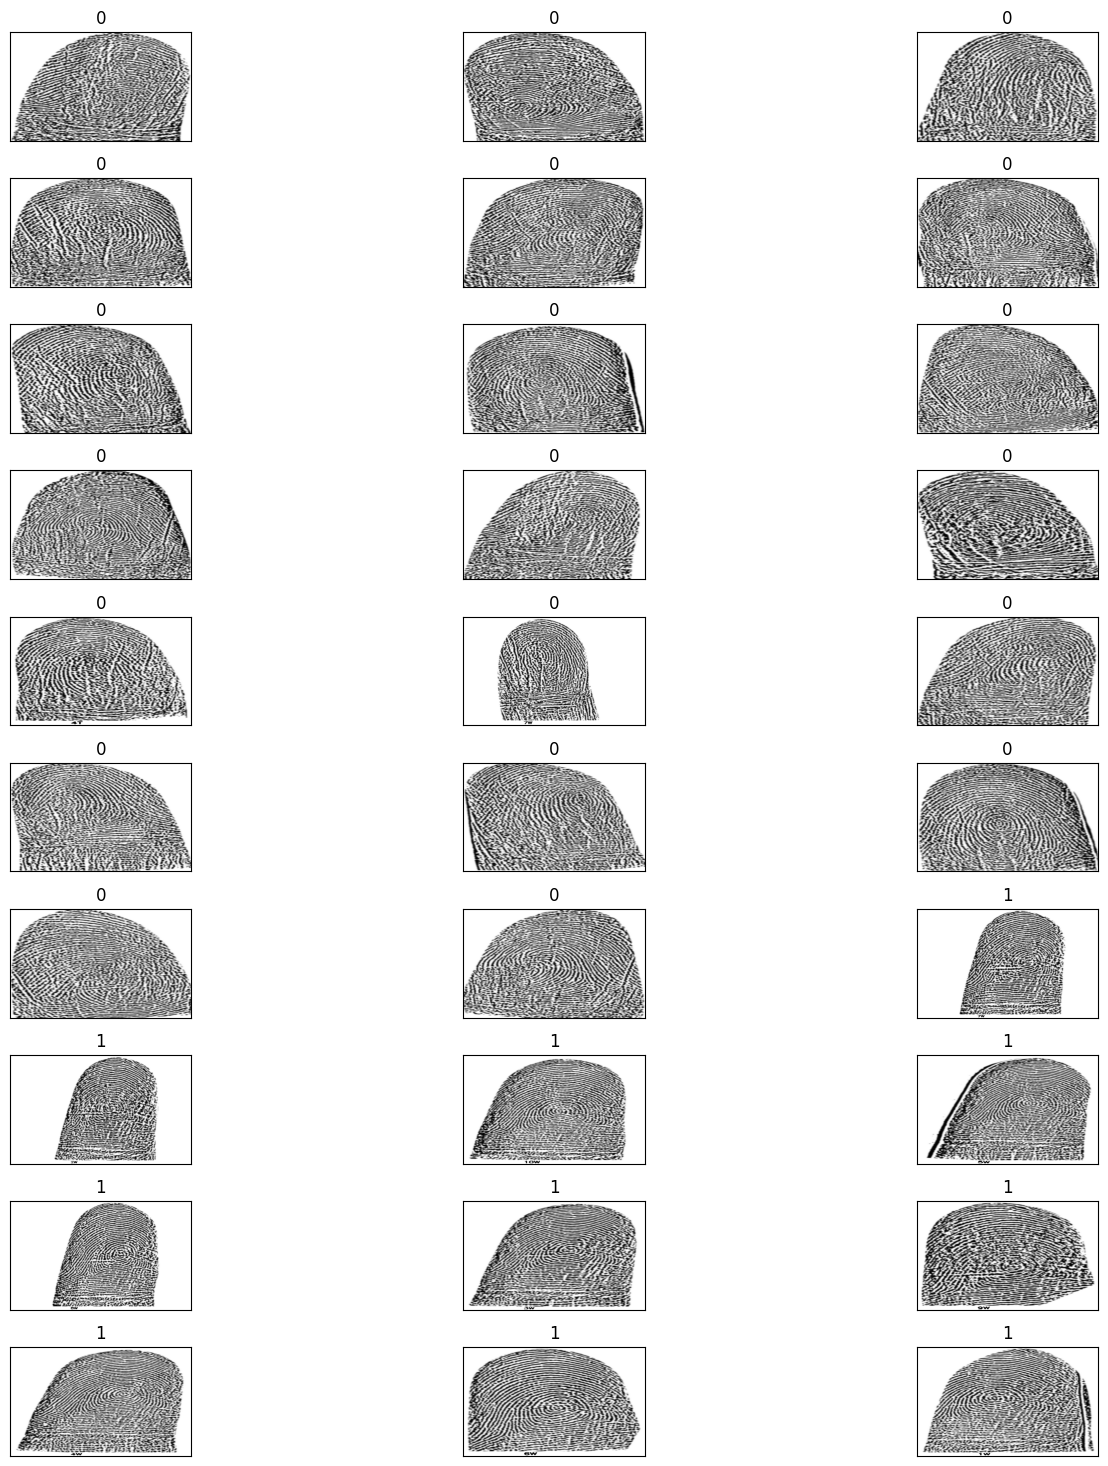

In [214]:
# To get the 1st batch from test dataset
for test_data_batch, test_labels_batch in test_dataset:
    print('test_data batch shape:', test_data_batch.shape)
    print('test_labels batch shape:', test_labels_batch.shape)
    break

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,15))
for i in range(30):
  plt.subplot(10,3,i+1)
  plt.tight_layout()
  plt.imshow(test_data_batch[i].numpy().astype("uint8"))
  plt.title(f"{test_labels_batch[i]}")
  plt.xticks([])
  plt.yticks([])

In [215]:
# Evalution test dataset1
loss, acc = model1.evaluate(test_dataset1)
print(f"Test accuracy for FE2 model: {100*acc :5.2f}%")

1/1 [==============================] - 0s 282ms/step - loss: 482.0858 - accuracy: 0.0500
Test accuracy for FE2 model:  5.00%


In [216]:
# Evalution test dataset2
FE2model_restored1 = models.load_model('/drive/My Drive/h5/fingers_model2bc2_FEa.h5')
loss, acc = FE2model_restored1.evaluate(test_dataset)
print(f"Restored model, Test accuracy for FE2 model: {100*acc :.2f}%")

2/2 [==============================] - 1s 44ms/step - loss: 17.4115 - accuracy: 0.9500
Restored model, Test accuracy for FE2 model: 95.00%


# **Avarage Esemble models**

In [217]:
# Load models
model1 = keras.models.load_model('/drive/My Drive/h5/fingers_modelbc2a.h5')
model2 = keras.models.load_model('/drive/My Drive/h5/fingers_model2bc2_FEa.h5')

test_loss1, test_acc1 = model1.evaluate(test_dataset)
test_loss2, test_acc2 = model2.evaluate(test_dataset)

ensemble_accuracy = (test_acc1 + test_acc2) / 2
print(f"Ensemble accuracy: {ensemble_accuracy:.2f}%")

# Make predictions
pred1 = model1.predict(test_dataset)
pred2 = model2.predict(test_dataset)

# Convert predictions to probabilities
prob1 = pred1.squeeze()  # Assuming pred1 has shape (batch_size, 1), squeeze to remove singleton dimension
prob2 = pred2.squeeze()  # Assuming pred2 has shape (batch_size, 1), squeeze to remove singleton dimension

# Now prob1 and prob2 contain class probabilities for the positive class
# finalpred=(pred1+pred2)/2
# print(finalpred)



# Calculate overall probability
overall_prob = np.mean([prob1, prob2], axis=0)

print(overall_prob)

2/2 [==============================] - 1s 46ms/step - loss: 17.4115 - accuracy: 0.9500
Ensemble accuracy: 0.72%
2/2 [==============================] - 0s 109ms/step
[0.22350423 0.22021525 0.22301923 0.21838966 0.22088689 0.21869376
 0.22154336 0.21996836 0.22034883 0.22179753 0.22437555 0.22158161
 0.22144903 0.7375604  0.22322543 0.2210442  0.22138044 0.22011398
 0.22004578 0.22246026 0.73729885 0.7372553  0.7290769  0.73043007
 0.73725486 0.72850907 0.22053345 0.7285324  0.72180897 0.72508776
 0.72855705 0.72157216 0.72941214 0.72942907 0.7294613  0.7220707
 0.7381677  0.72145474 0.7376579  0.72866434]


test_data batch shape: (32, 300, 500, 3)
test_labels batch shape: (32,)
1/1 [==============================] - 0s 19ms/step


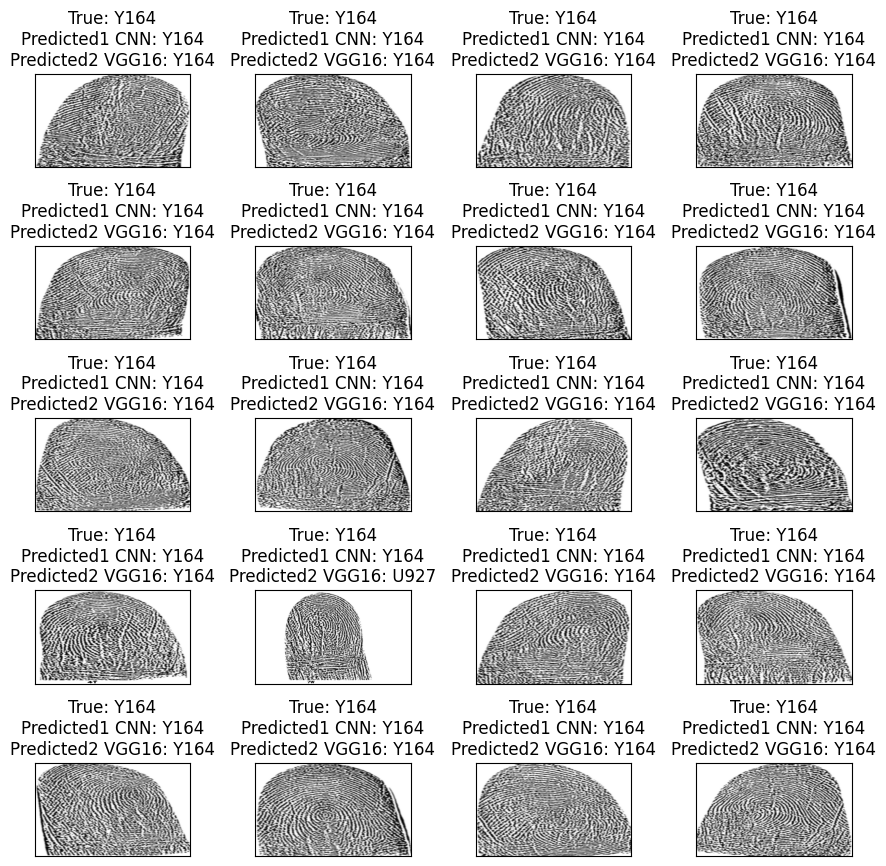

In [218]:
import matplotlib.pyplot as plt
import numpy as np

# To get the 1st batch from test dataset
for test_data_batch, test_labels_batch in test_dataset:
    print('test_data batch shape:', test_data_batch.shape)
    print('test_labels batch shape:', test_labels_batch.shape)
    break

plt.figure(figsize=(9,9))
for i in range(20):  # Displaying 30 images
    plt.subplot(5,4,i+1)
    plt.tight_layout()
    plt.imshow(test_data_batch[i].numpy().astype("uint8"))

    # Make predictions using both models
    pred1 = model1.predict(np.expand_dims(test_data_batch[i], axis=0))
    pred2 = model2.predict(np.expand_dims(test_data_batch[i], axis=0))

    # Convert predictions to class labels
    label1 = "Y164" if pred1 < 0.5 else "U927"
    label2 = "Y164" if pred2 < 0.5 else "U927"

    # Display correct and predicted labels
    correct_label = "Y164" if test_labels_batch[i] == 0 else "U927"
    plt.title(f"True: {correct_label}\nPredicted1 CNN: {label1}\nPredicted2 VGG16: {label2}")

    plt.xticks([])
    plt.yticks([])

plt.show()
